In [1]:
%load_ext lab_black
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz


def cm2inch(value):
    return value / 2.54


# axes.xaxis.set_tick_params(direction='in', which='both')
# axes.yaxis.set_tick_params(direction='in', which='both')


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")


def cm2inch(value):
    return value / 2.54


def cm2inch(value):
    return value / 2.54


def gauss_function(x, a, x0, sigma):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))


def pdf(data, bins=10, density=True):

    pdf, bins_edge = np.histogram(data, bins=bins, density=density)
    bins_center = (bins_edge[0:-1] + bins_edge[1:]) / 2

    return pdf, bins_center

In [144]:
dataset = loadmat(
    "../../../chapter3/images/simulation_confined_Brownian_motion/data_long.mat"
)
for i in dataset.keys():
    try:
        dataset[i] = np.squeeze(dataset[i])
    except:
        continue

In [147]:
x = dataset["x"]
y = dataset["y"]

In [148]:
x

array([ 0.00000000e+00, -5.72129438e-08, -1.96935238e-07, ...,
        1.03360418e-04,  1.03421985e-04,  1.03494989e-04])

In [179]:
def _C4(x, t):
    return (
        1
        / 24
        * (np.mean((x[:-t] - x[t:]) ** 4) - 3 * (np.mean((x[:-t] - x[t:]) ** 2)) ** 2)
    )


def C4(x, t):
    return np.array([(_C4(x, i) + _C4(y, i)) / 2 for i in t])


tt = np.array(
    [
        *np.arange(1, 10, 1),
        *np.arange(10, 100, 10),
        *np.arange(100, 1000, 100),
        *np.arange(1000, 10000, 1000),
        *np.arange(10000, 100000, 10000),
        *np.arange(100000, 1000000, 100000),
        *np.arange(1000000, 10000000, 1000000),
    ]
)

In [180]:
c4 = C4(x, tt)

C:\Users\m.lavaud\.conda\envs\analyse\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\m.lavaud\.conda\envs\analyse\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


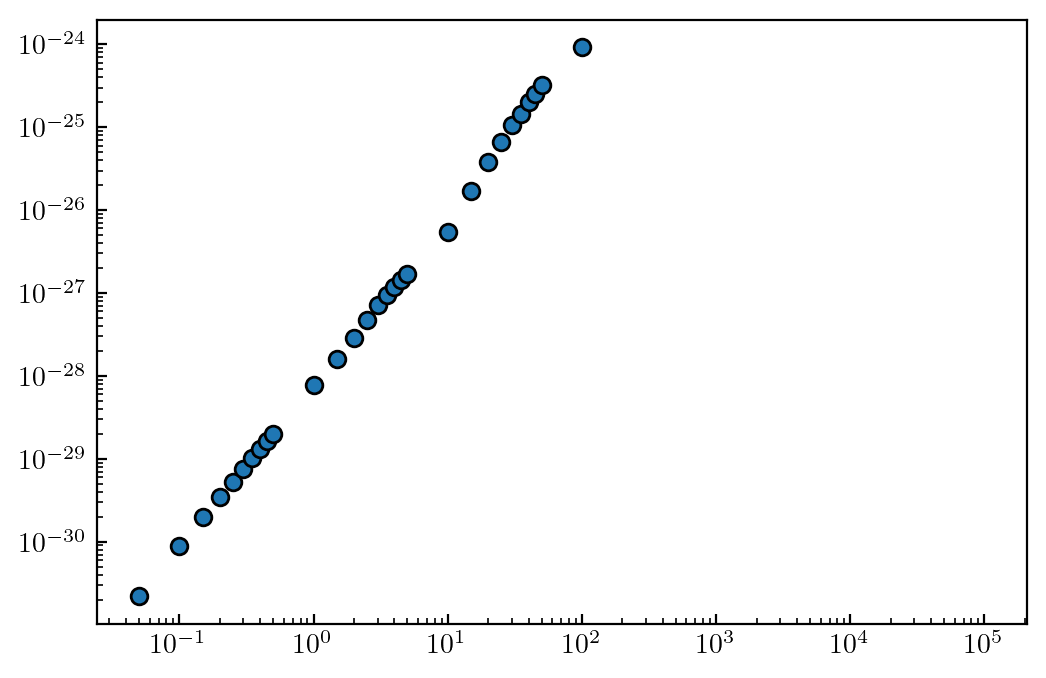

In [181]:
plt.loglog(tt * 0.05, c4, "o")

In [182]:
def Dx_z(z):
    r = 2.5e-6
    result = (
        1
        - 9 / 16 * (r / (z + r))
        + 1 / 8 * (r / (z + r)) ** 3
        - 45 / 256 * (r / (z + r)) ** 4
        - 1 / 16 * (r / (z + r)) ** 5
    )
    return result * D0


def P_b(z, B, ld, lb):
    lb = lb * 1e-9
    ld = ld * 1e-9
    z = z
    P_b = np.exp(-B * np.exp(-z / (ld)) - z / lb)
    P_b[z < 0] = 0

    # Normalization of P_b

    A = trapz(P_b, z)
    P_b = P_b / A

    return P_b

In [195]:
B = 4.8
ld = 50
lb = 4e-21 / (4 / 3 * np.pi * 50 * 2.5e-6 ** 3 * 9.81) * 1e9
D0 = 4e-21 / (6 * np.pi * 0.001 * 1.5e-6)
z = np.linspace(1e-9, 5e-6, 1000000)
D_moy = Dx_z(z) * P_b(z, B, ld, lb)
D_moy = np.trapz(D_moy, z)

D_moy2 = Dx_z(z) ** 2 * P_b(z, B, ld, lb)
D_moy2 = np.trapz(D_moy2, z)

In [196]:
lb

124.59836523402198

In [197]:
(D_moy2 - D_moy ** 2) / 2

3.272018994057644e-29

In [185]:
def short_c4(t):
    return t ** 2 / 2 * (D_moy2 - D_moy ** 2)


tth = np.linspace(1e-2, 1e3, 10)

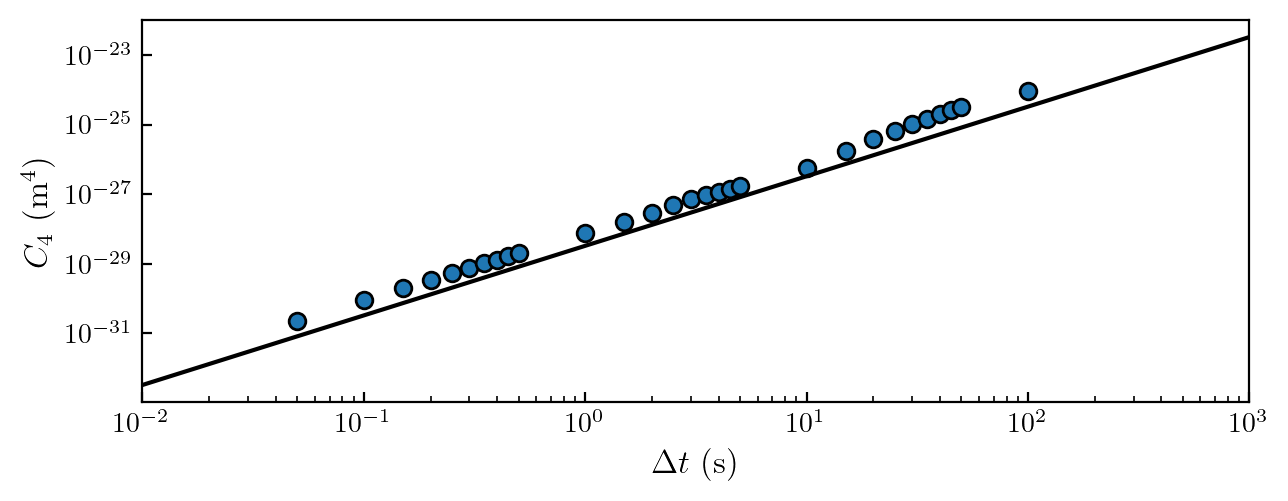

In [199]:
fig = plt.figure(figsize=(cm2inch(16), cm2inch(6)))

plt.loglog(tt * 0.05, c4, "o")
plt.plot(tth, short_c4(tth), color="k")
plt.xlim(1e-2, 1e3)

plt.ylabel("$C_4$ (m$^4$)")
plt.xlabel("$\Delta t$ (s)")

plt.tight_layout(pad=0.2)
plt.savefig("simulatedc4.pdf")

In [103]:
(D_moy2 - D_moy ** 2) / 2

1.3168705251069663e-28